<a href="https://colab.research.google.com/github/rishisai0811/NLP_ASSIGNMENT/blob/main/NLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest Accuracy: 100.00%

LIME explanation for Random Forest:



Alibi explanation for Random Forest: ['sepal width (cm) <= -0.59', '-1.18 < petal width (cm) <= 0.13', 'petal length (cm) > 0.28']

PyCaret interpretation for Random Forest:


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

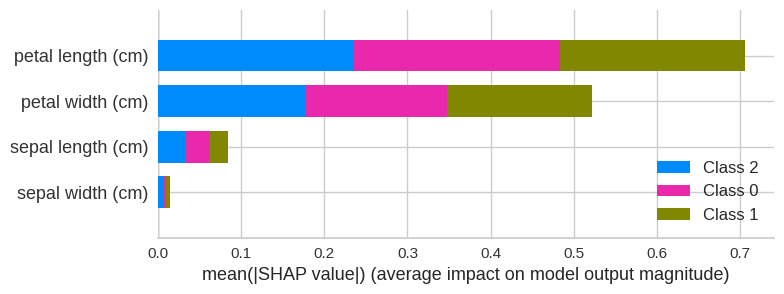


ELI5 Permutation Importance for Random Forest:

Yellowbrick Classification Report for Random Forest:


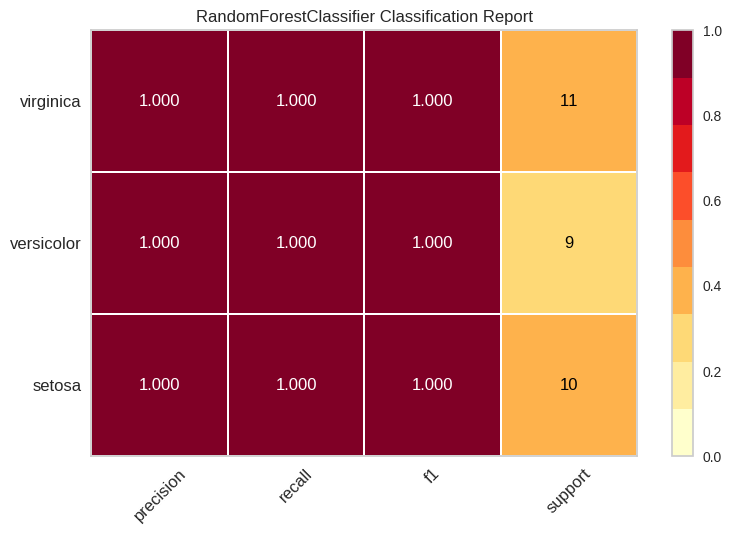


Yellowbrick ROCAUC for Random Forest:


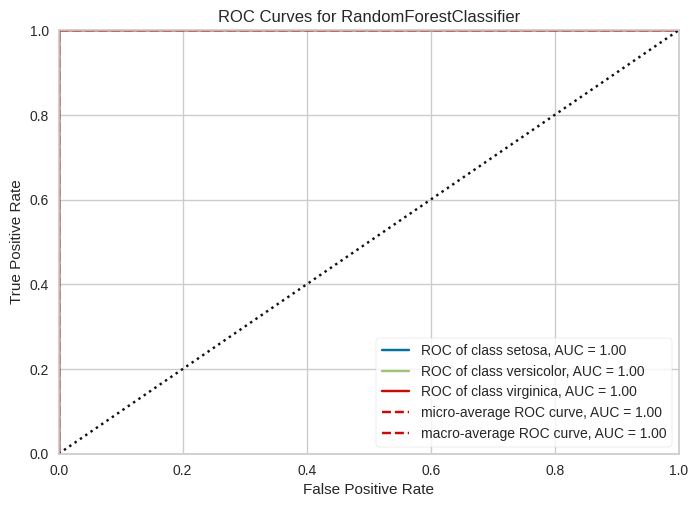


--------------------------------------------------

SVM Accuracy: 96.67%

LIME explanation for SVM:



Alibi explanation for SVM: ['petal width (cm) <= 0.13', 'petal length (cm) > 0.28']

PyCaret interpretation for SVM:


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

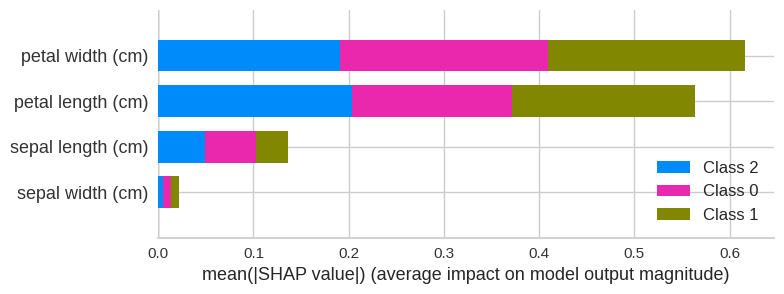


ELI5 Permutation Importance for SVM:

Yellowbrick Classification Report for SVM:


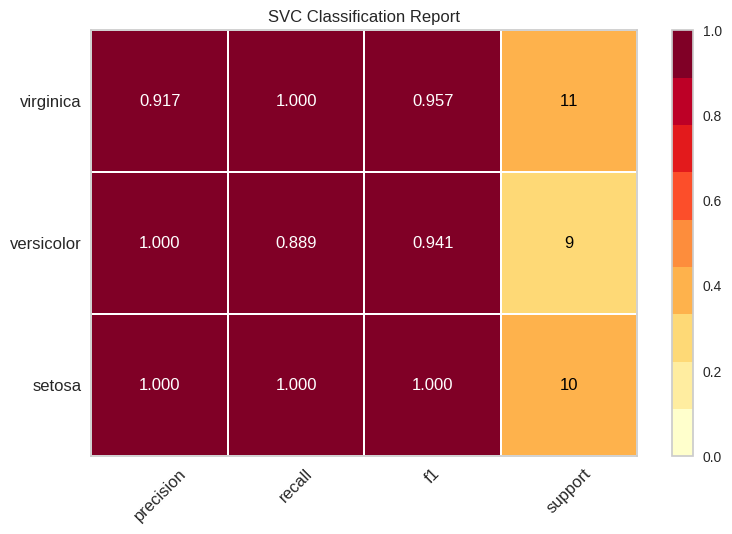


Yellowbrick ROCAUC for SVM:


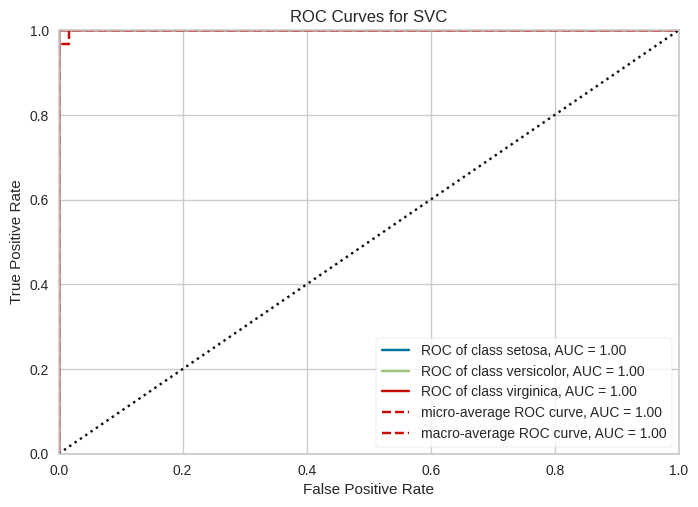


--------------------------------------------------

Gradient Boosting Accuracy: 100.00%

LIME explanation for Gradient Boosting:



Alibi explanation for Gradient Boosting: ['0.28 < petal length (cm) <= 0.76', '-1.18 < petal width (cm) <= 0.13', 'sepal length (cm) > -0.11', 'sepal width (cm) <= -0.59']

PyCaret interpretation for Gradient Boosting:


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

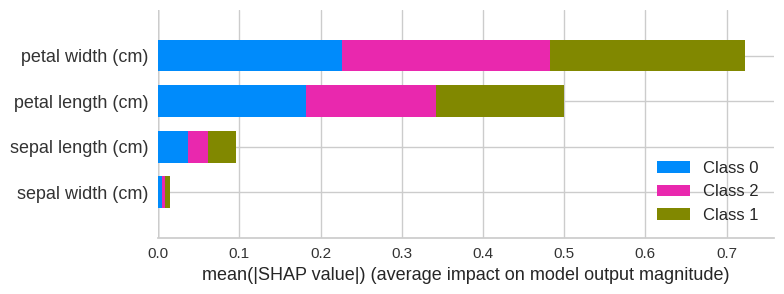


ELI5 Permutation Importance for Gradient Boosting:

Yellowbrick Classification Report for Gradient Boosting:


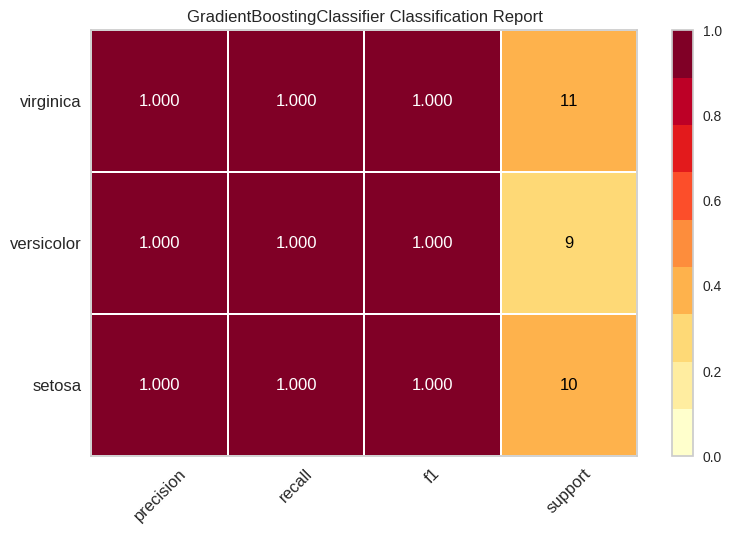


Yellowbrick ROCAUC for Gradient Boosting:


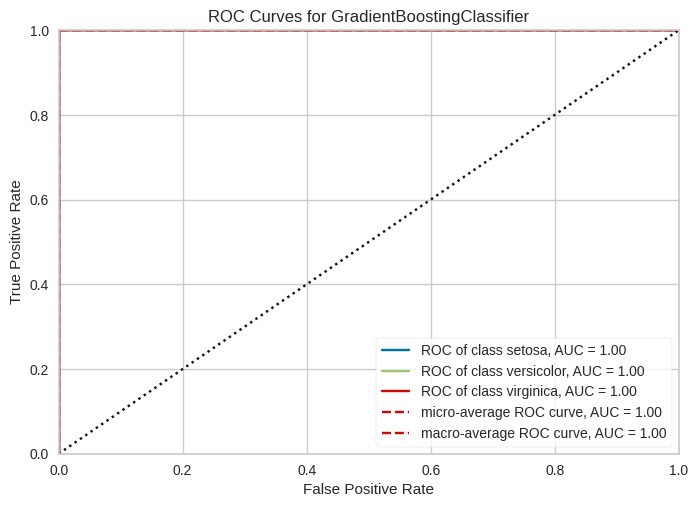


--------------------------------------------------



In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lime.lime_tabular import LimeTabularExplainer
from alibi.explainers import AnchorTabular
from pycaret.classification import *
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from yellowbrick.classifier import ClassificationReport, ROCAUC

# Load Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for PyCaret
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Preprocessing: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    # Evaluate the model
    accuracy = clf.score(X_test, y_test)
    print(f"{clf_name} Accuracy: {accuracy * 100:.2f}%")

    # LimeTabularExplainer
    lime_explainer = LimeTabularExplainer(X_train, feature_names=iris.feature_names, class_names=iris.target_names, discretize_continuous=True)
    lime_exp = lime_explainer.explain_instance(X_test[0], clf.predict_proba)

    # Show Lime explanation
    print(f"\nLIME explanation for {clf_name}:")
    lime_exp.show_in_notebook()

    # Alibi
    explainer_alibi = AnchorTabular(predictor=clf.predict_proba, feature_names=iris.feature_names, categorical_names={})
    explainer_alibi.fit(X_train)
    explanation_alibi = explainer_alibi.explain(X_test[0])
    print(f"\nAlibi explanation for {clf_name}: {explanation_alibi['anchor']}")

    # PyCaret
    print(f"\nPyCaret interpretation for {clf_name}:")
    exp = setup(data=df, target='target', verbose=False)
    interpret_model(create_model('rf'))  # Use code name here

    # ELI5 Permutation Importance
    perm_importance = PermutationImportance(clf, random_state=42).fit(X_test, y_test)
    print(f"\nELI5 Permutation Importance for {clf_name}:")
    eli5.show_weights(perm_importance, feature_names=iris.feature_names)

    # Yellowbrick Classification Report
    visualizer = ClassificationReport(clf, classes=iris.target_names, support=True)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    print(f"\nYellowbrick Classification Report for {clf_name}:")
    visualizer.show()

    # Yellowbrick ROCAUC
    visualizer_roc = ROCAUC(clf, classes=iris.target_names)
    visualizer_roc.fit(X_train, y_train)
    visualizer_roc.score(X_test, y_test)
    print(f"\nYellowbrick ROCAUC for {clf_name}:")
    visualizer_roc.show()
    print('\n' + '-'*50 + '\n')
